# Fibonaccijeva spirala

## Zadatak

Napišite funkciju koja prima n (jednoznamenkast) i crta zlatnu spiralu kroz n kvadrata. (Primjer za n=10, samo bez dijela spirale kroz prva dva kvadrata, je na https://i.stack.imgur.com/eHWK9.png.) U kvadratima trebaju biti upisani odgovarajući Fibonaccijevi brojevi (bilo bi dobro da su različitih veličina i da ih spirala ne siječe, ali nije nužno). Kvadrati bi trebali biti različitih boja (odaberite colormap s tim svojstvom po volji). Orijentirajte spiralu kako želite (bilo bi dobro da joj je za svaki n širina veća od visine, ali nije nužno).

(Napominjem da "spirala" zapravo matematički nije spirala, već n spojenih četvrtinâ kruga.)

Testirajte funkciju pozivanjem sa svim jednoznamenkastim brojevima.

## Rješenje

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Arc
from matplotlib.collections import PatchCollection

Funkcija `fib` predstavlja pomoćnu funkciju koja vraća listu n Fibonaccijevih brojeva počevši od 1. 

In [2]:
def fib(n):
    a = 0
    b = 1
    fibList = [1]
    for i in range(n-1):
        c = a + b
        fibList.append(c)
        a = b
        b = c
    return fibList

Najprije generirajmo listu $n$ Fibonaccijevih brojeva. Obrnemo poredak elemenata u listi, kako ćemo graditi kvadrate počevši od najvećeg. Nakon što smo postavili maksimalne vrijednosti $x$ i $y$ osi, krećemo na `for` petlju kojom idemo po svim elementima obratnog Fibonaccijevog niza. Kvadrate ćemo kreirati uz pomoć `Rectangles`, koji prima lijevi donji rub kvadrata. Uočimo pattern u tim točkama, s obzirom na djeljivost s brojem $4$. Uz malo crtanja sastrane, lako dođemo do donjih formula koje nam daju ispravne koordinate. Također upamtimo koordinate središta kružnice (četvrtine kruga) te uz pomoć `theta7_arc` i `theta2_arc` pamtimo koja četvrtina kružnice nam treba. Kružnice kreiramo koristeći se `Arc`. Na kraju još dodamo text, čiju smo poziciju također pamtili u uvjetima for petlje. 

In [3]:
def fibSquares(n):
    
    if n == 0: 
        return print("Unesite jednoznamenkasti broj veći od 0.")

    fibList = fib(n)
    fibList.reverse()
    fibArray = np.array(fibList)
 
    fig, ax1 = plt.subplots(figsize = (15,9))
    
    if fibArray.size == 1:
        ax1.set_xlim(0, fibArray[0])
        ax1.set_ylim(0,fibArray[0])
    else:
        ax1.set_xlim(0, fibArray[0] + fibArray[1])
        ax1.set_ylim(0,fibArray[0])

    prev_x = 0
    prev_y = 0
    x_arc = 0
    y_arc = 0
    
    colors = np.array([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.1])
    patches = []

    for i in range(0,n):

        if i == 0:
            x = prev_x 
            y = prev_y
            x_arc = x + fibArray[i]
            y_arc = y
            theta1_arc = 90.0
            theta2_arc = 180.0
            x_text = fibArray[i]/2 + x 
            y_text = fibArray[i]/2 + y  
            
        elif i % 4 == 0:
            x = prev_x
            y = prev_y + fibArray[i-1]
            x_arc = x + fibArray[i]
            y_arc = y
            theta1_arc = 90.0
            theta2_arc = 180.0
            x_text = fibArray[i]/2 + x 
            y_text = fibArray[i]/2 + y  
            
        elif i % 4 == 1:
            x = prev_x + fibArray[i-1]
            y = prev_y + (fibArray[i-1] - fibArray[i])
            x_arc = x
            y_arc = y
            theta1_arc = 0.0
            theta2_arc = 90.0
            x_text = fibArray[i]/2 + x 
            y_text = fibArray[i]/2 + y 
            
        elif i % 4 == 2:
            x = prev_x + (fibArray[i-1] - fibArray[i])
            y = prev_y - fibArray[i]
            x_arc = x
            y_arc = y + fibArray[i]
            theta1_arc = 270.0
            theta2_arc = 360.0
            x_text = fibArray[i]/2 + x 
            y_text =fibArray[i]/2 + y  
            
        elif i % 4 == 3:
            x = prev_x - fibArray[i]
            y = prev_y
            x_arc = x + fibArray[i]
            y_arc = y + fibArray[i]
            theta1_arc = 180.0
            theta2_arc = 270.0
            x_text = fibArray[i]/2 + x 
            y_text =fibArray[i]/2 + y  
            
        prev_x = x
        prev_y = y
     
    
        font_size = 30 - 3*i 
   
        rectangle = Rectangle([x,y], fibArray[i], fibArray[i])
        patches.append(rectangle)
        ax1.add_patch(Arc([x_arc,y_arc], 2*fibArray[i], 2*fibArray[i], theta1 = theta1_arc, theta2 = theta2_arc, color = 'black', fill = False))
        ax1.text(x_text, y_text, str(fibArray[i]), va = 'center', ha = 'center', fontsize = font_size)
    
    p = PatchCollection(patches, cmap = 'PuBuGn', edgecolor = 'black')
    p.set_array(colors)
    ax1.add_collection(p)
    #plt.axis('off')
    plt.show()
    

## Testiranje

Slike sam napravila većima da bude jasnije što je nacrtano, jer se na manjim figurama nisu jasno vidjeli kvadrati površine $1$. Također sam maknula brojeve na osima kako bi izgledalo ljepše. Ako slika zahtjeva scrollanje, klikom lijevo od nje se dobije puni prikaz.

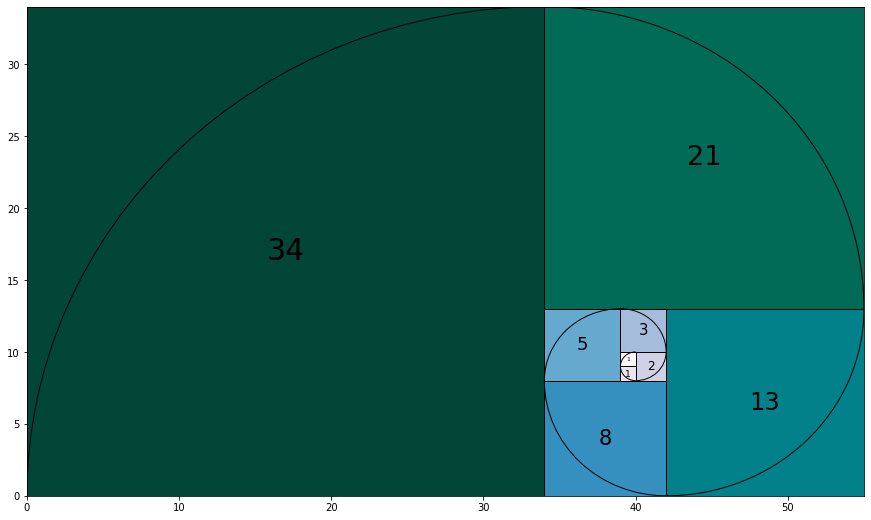

In [4]:
fibSquares(9)

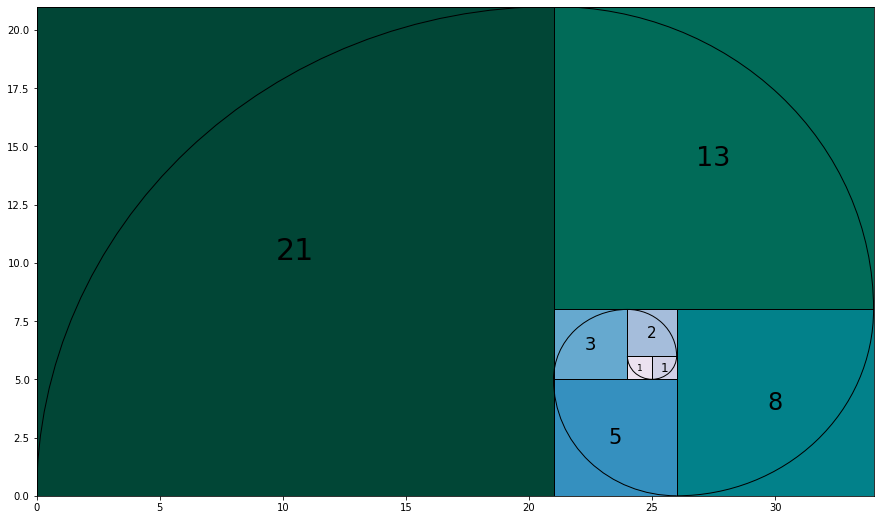

In [5]:
fibSquares(8)

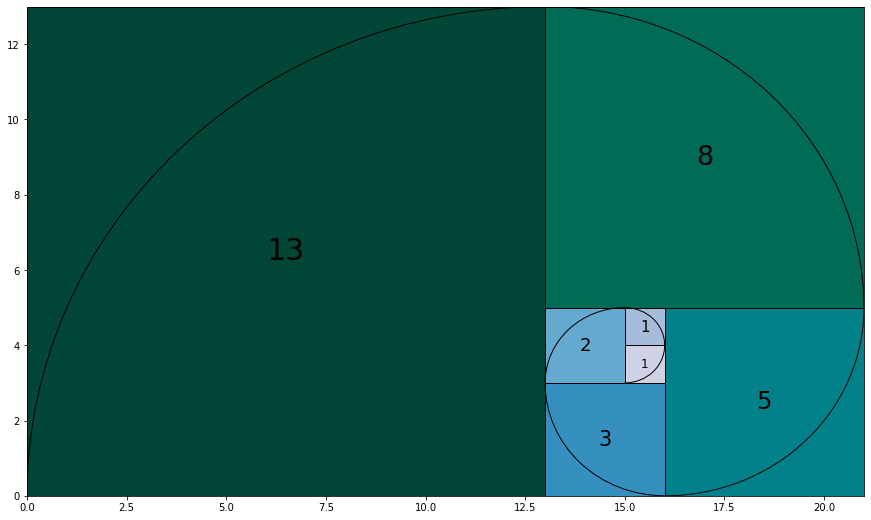

In [6]:
fibSquares(7)

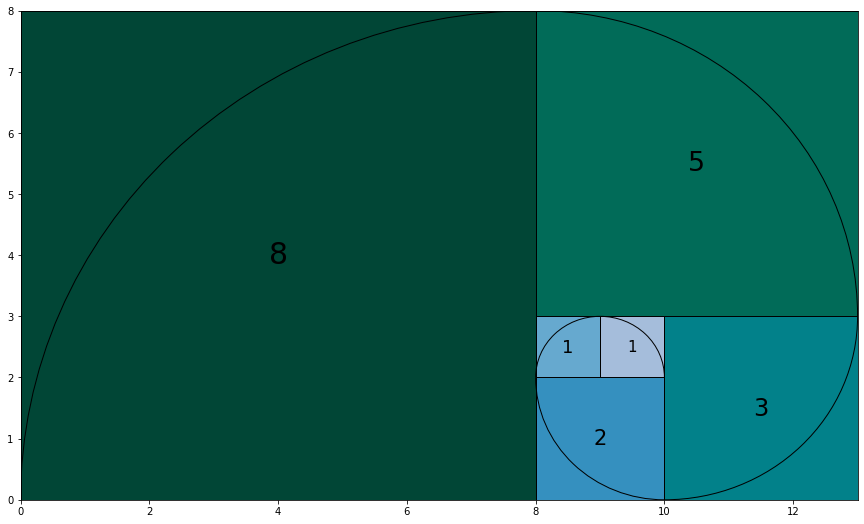

In [7]:
fibSquares(6)

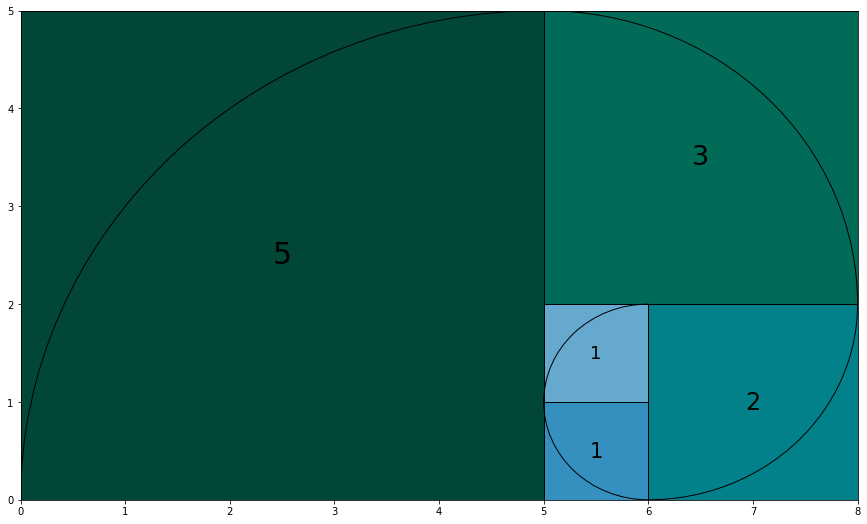

In [8]:
fibSquares(5)

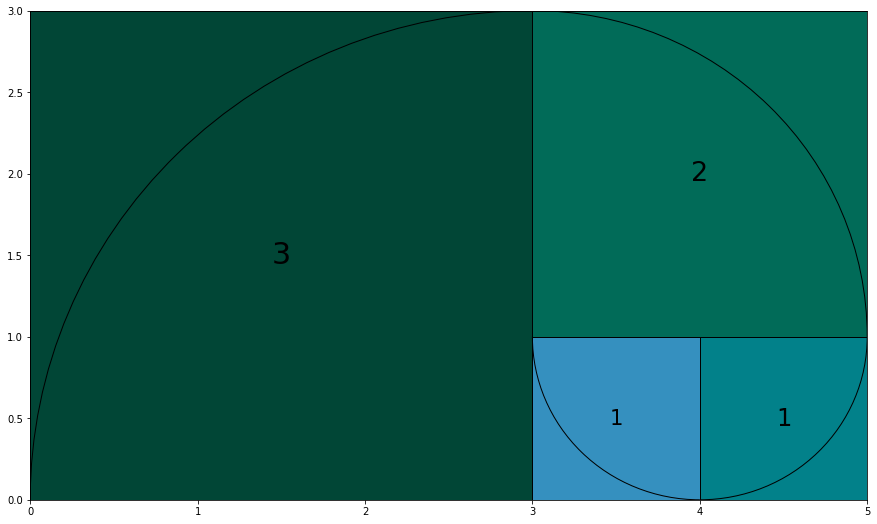

In [9]:
fibSquares(4)

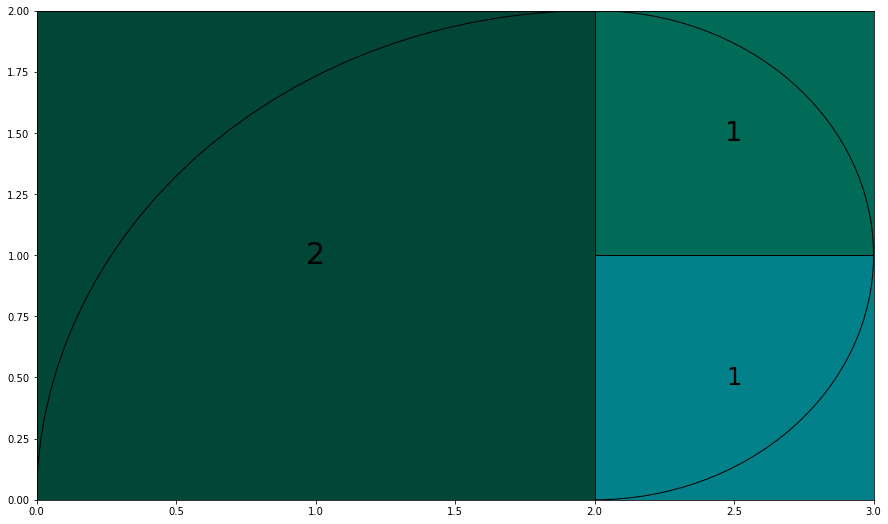

In [10]:
fibSquares(3)

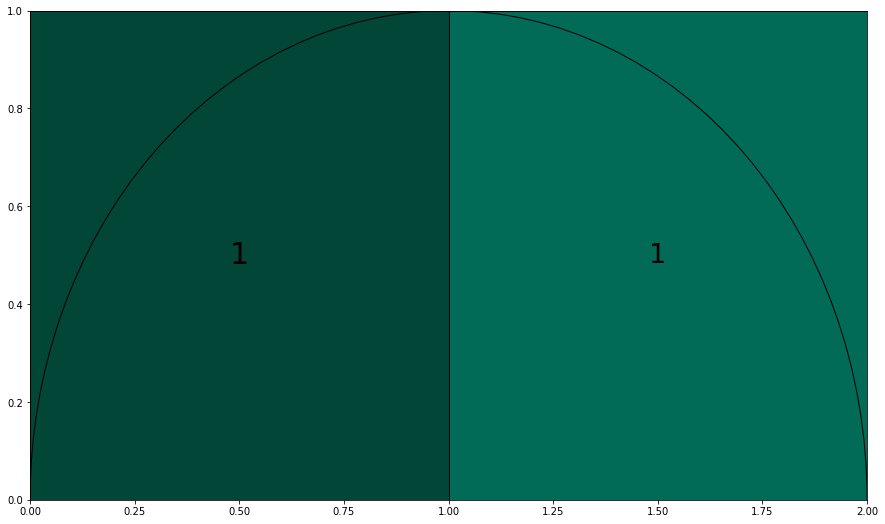

In [11]:
fibSquares(2)

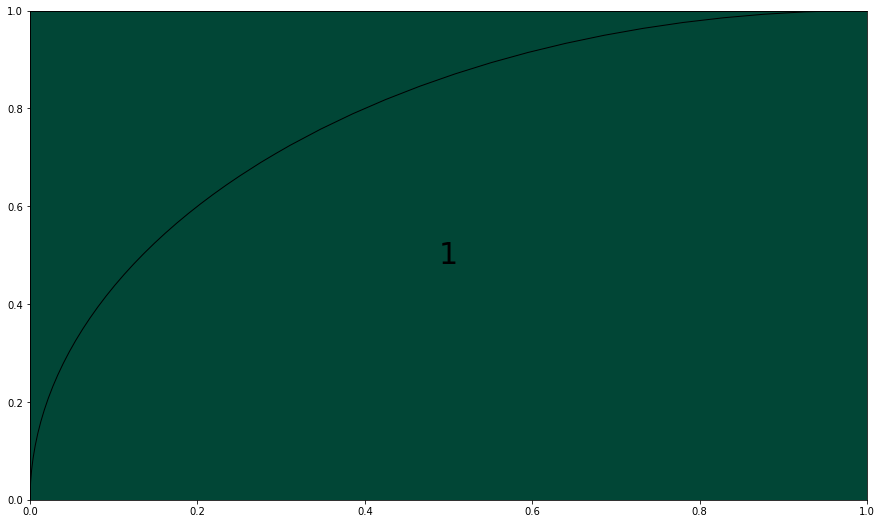

In [12]:
fibSquares(1)

In [13]:
fibSquares(0)

Unesite jednoznamenkasti broj veći od 0.


Vidimo da za $n =10$, slika izgleda kao u danom primjeru u zadatku.

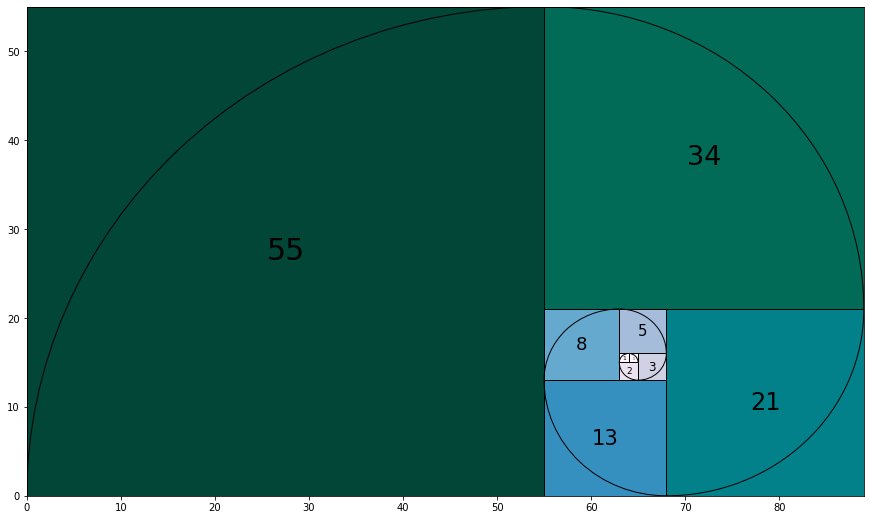

In [14]:
fibSquares(10)